In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model, grid_search

import torch
import inference_helpers

import json

In [6]:
## randomized search
num_models = 8
best_model_params = []
for k in range(1, num_models+1):
    print(f"MODEL CROSS VALIDATING - #{k}")
    print(20*"--")
    config = get_config()
    config["model_folder"] = "cv_weights"
    config["experiment_name"] = "cv_run/tmodel"
    config["run"] = "cv_run"

    param_grid = {
        "d_ff": [64, 128, 256],
        "d_d": [256, 512],
        "Nx": [1, 2],
        "n_head": [2],
        "dropout": [0.2, 0.4],
        "lr": [5*10**-4, 2.5*10**-4]
    }
    config["tgt_step"] = k-1
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    res, best_params, best_score = grid_search(config, device, lr_cv = None, n_epoch = 40, param_grid = param_grid, n_iter=32)
    best_model_params.append(best_params)
    print("Best params:", str(best_params))
    print(20*"--")

with open(f"params.json", "w") as outfile: 
    json.dump({"param_grid": param_grid, "best_params": best_model_params}, outfile)

MODEL CROSS VALIDATING - #1
----------------------------------------


  0%|          | 0/32 [00:00<?, ?it/s]

hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


  3%|▎         | 1/32 [06:10<3:11:24, 370.46s/it]

Scores: 19519.47, 16861.52, 14957.95, 13807.83; avg score: 16286.69
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


  6%|▋         | 2/32 [10:13<2:27:48, 295.63s/it]

Scores: 19270.41, 16719.14, 15971.04, 13652.47; avg score: 16403.27
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


  9%|▉         | 3/32 [14:12<2:10:26, 269.87s/it]

Scores: 20779.14, 17213.41, 15018.81, 14016.77; avg score: 16757.03
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 12%|█▎        | 4/32 [20:28<2:25:24, 311.58s/it]

Scores: 19781.53, 16682.86, 14969.96, 13830.10; avg score: 16316.11
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 16%|█▌        | 5/32 [24:30<2:08:57, 286.59s/it]

Scores: 20695.30, 17372.64, 17749.32, 13919.88; avg score: 17434.29
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 19%|█▉        | 6/32 [30:46<2:17:16, 316.79s/it]

Scores: 20362.52, 17491.71, 18188.86, 14072.94; avg score: 17529.01
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 22%|██▏       | 7/32 [36:59<2:19:42, 335.31s/it]

Scores: 19602.80, 16249.38, 15505.13, 13711.83; avg score: 16267.28
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 25%|██▌       | 8/32 [41:06<2:02:53, 307.21s/it]

Scores: 19055.26, 17731.38, 15753.30, 13737.15; avg score: 16569.27
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 28%|██▊       | 9/32 [47:20<2:05:48, 328.19s/it]

Scores: 21398.72, 16777.67, 13943.96, 13798.83; avg score: 16479.79
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 31%|███▏      | 10/32 [53:46<2:06:52, 346.01s/it]

Scores: 23929.14, 18014.22, 14224.51, 13812.00; avg score: 17494.97
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 34%|███▍      | 11/32 [1:00:20<2:06:14, 360.70s/it]

Scores: 21362.73, 16949.37, 19461.45, 13894.79; avg score: 17917.08
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 38%|███▊      | 12/32 [1:06:45<2:02:38, 367.93s/it]

Scores: 20989.11, 17696.60, 16100.25, 14144.54; avg score: 17232.62
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 41%|████      | 13/32 [1:13:03<1:57:30, 371.07s/it]

Scores: 20003.57, 16859.89, 15299.78, 13720.12; avg score: 16470.84
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 44%|████▍     | 14/32 [1:17:09<1:40:01, 333.39s/it]

Scores: 19144.91, 16713.36, 21360.20, 13975.32; avg score: 17798.45
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 47%|████▋     | 15/32 [1:21:13<1:26:47, 306.33s/it]

Scores: 20444.73, 17421.26, 15959.85, 14013.74; avg score: 16959.90
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 50%|█████     | 16/32 [1:27:24<1:26:53, 325.82s/it]

Scores: 19303.67, 17406.13, 14151.16, 13565.80; avg score: 16106.69
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 53%|█████▎    | 17/32 [1:31:26<1:15:08, 300.56s/it]

Scores: 21826.35, 17574.40, 17663.46, 14145.96; avg score: 17802.54
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 56%|█████▋    | 18/32 [1:37:40<1:15:16, 322.62s/it]

Scores: 20937.62, 16407.88, 15790.74, 13863.18; avg score: 16749.85
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 59%|█████▉    | 19/32 [1:41:44<1:04:47, 299.07s/it]

Scores: 19479.34, 16991.98, 15271.55, 13740.22; avg score: 16370.77
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 62%|██████▎   | 20/32 [1:47:58<1:04:18, 321.53s/it]

Scores: 20912.07, 17929.37, 15619.36, 14111.63; avg score: 17143.11
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 66%|██████▌   | 21/32 [1:54:12<1:01:48, 337.14s/it]

Scores: 21887.37, 18086.29, 14692.53, 13970.94; avg score: 17159.28
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 69%|██████▉   | 22/32 [2:00:23<57:54, 347.48s/it]  

Scores: 20661.20, 18325.02, 15559.70, 14342.00; avg score: 17221.98
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 72%|███████▏  | 23/32 [2:06:35<53:13, 354.86s/it]

Scores: 20897.76, 17635.27, 14172.23, 14122.81; avg score: 16707.02
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 75%|███████▌  | 24/32 [2:10:39<42:53, 321.65s/it]

Scores: 22245.55, 17505.74, 15660.40, 14032.94; avg score: 17361.16
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 78%|███████▊  | 25/32 [2:16:49<39:12, 336.12s/it]

Scores: 19799.23, 16781.24, 14617.79, 14240.56; avg score: 16359.70
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 81%|████████▏ | 26/32 [2:22:59<34:37, 346.29s/it]

Scores: 20052.45, 16541.01, 14231.97, 13803.65; avg score: 16157.27
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 84%|████████▍ | 27/32 [2:27:03<26:17, 315.59s/it]

Scores: 20394.65, 17332.75, 14957.90, 13744.96; avg score: 16607.57
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 88%|████████▊ | 28/32 [2:31:05<19:33, 293.39s/it]

Scores: 20320.22, 17632.06, 14087.93, 13713.02; avg score: 16438.31
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 91%|█████████ | 29/32 [2:37:15<15:48, 316.33s/it]

Scores: 20102.43, 16321.34, 15002.20, 13638.53; avg score: 16266.12
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 94%|█████████▍| 30/32 [2:41:17<09:48, 294.06s/it]

Scores: 20768.81, 17611.74, 18188.33, 14206.16; avg score: 17693.76
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 97%|█████████▋| 31/32 [2:47:28<05:17, 317.14s/it]

Scores: 20402.31, 18068.61, 17018.46, 13768.86; avg score: 17314.56
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


100%|██████████| 32/32 [2:51:30<00:00, 321.58s/it]

Scores: 20207.21, 18421.87, 14155.97, 14596.91; avg score: 16845.49
--------------------
Best params: {'d_ff': 128, 'd_d': 512, 'Nx': 2, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005}
----------------------------------------
MODEL CROSS VALIDATING - #2
----------------------------------------



  0%|          | 0/32 [00:00<?, ?it/s]

hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


  3%|▎         | 1/32 [06:13<3:13:00, 373.56s/it]

Scores: 27364.29, 23782.41, 18848.73, 20140.17; avg score: 22533.90
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


  6%|▋         | 2/32 [12:28<3:07:11, 374.37s/it]

Scores: 26969.97, 24000.13, 18545.72, 19729.37; avg score: 22311.29
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


  9%|▉         | 3/32 [18:43<3:01:05, 374.66s/it]

Scores: 26443.89, 22886.04, 18289.70, 19768.38; avg score: 21847.00
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 12%|█▎        | 4/32 [24:54<2:54:11, 373.26s/it]

Scores: 27878.59, 23478.59, 18080.02, 19663.52; avg score: 22275.18
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 16%|█▌        | 5/32 [28:56<2:26:39, 325.92s/it]

Scores: 26455.52, 23072.75, 18375.22, 19461.86; avg score: 21841.34
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 19%|█▉        | 6/32 [35:07<2:27:53, 341.28s/it]

Scores: 27852.47, 23204.06, 20511.14, 19444.04; avg score: 22752.93
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 22%|██▏       | 7/32 [41:19<2:26:24, 351.38s/it]

Scores: 27404.48, 23588.82, 18563.66, 19572.81; avg score: 22282.44
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 25%|██▌       | 8/32 [47:32<2:23:11, 357.99s/it]

Scores: 29095.45, 23703.03, 20847.72, 19864.75; avg score: 23377.74
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 28%|██▊       | 9/32 [51:33<2:03:19, 321.72s/it]

Scores: 27400.80, 22787.61, 19774.44, 19708.96; avg score: 22417.95
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 31%|███▏      | 10/32 [55:37<1:49:07, 297.59s/it]

Scores: 27847.44, 23004.26, 18459.09, 19474.54; avg score: 22196.33
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 34%|███▍      | 11/32 [1:01:52<1:52:29, 321.39s/it]

Scores: 26849.63, 23532.97, 18794.04, 19464.94; avg score: 22160.39
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 38%|███▊      | 12/32 [1:08:09<1:52:41, 338.09s/it]

Scores: 26576.22, 23641.36, 18743.68, 19886.63; avg score: 22211.97
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 41%|████      | 13/32 [1:12:12<1:37:58, 309.41s/it]

Scores: 26574.98, 23313.78, 21079.56, 19500.72; avg score: 22617.26
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 44%|████▍     | 14/32 [1:16:15<1:26:46, 289.24s/it]

Scores: 27363.99, 22672.17, 18183.14, 19496.99; avg score: 21929.07
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 47%|████▋     | 15/32 [1:20:20<1:18:09, 275.86s/it]

Scores: 26978.89, 23556.43, 22079.01, 19833.81; avg score: 23112.03
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 50%|█████     | 16/32 [1:24:24<1:11:03, 266.49s/it]

Scores: 27087.95, 23140.29, 18844.18, 19487.10; avg score: 22139.88
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 53%|█████▎    | 17/32 [1:30:38<1:14:41, 298.75s/it]

Scores: 27970.77, 23998.88, 20340.07, 19640.93; avg score: 22987.66
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 56%|█████▋    | 18/32 [1:34:43<1:05:54, 282.47s/it]

Scores: 27458.06, 23081.41, 19823.94, 19373.59; avg score: 22434.25
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 59%|█████▉    | 19/32 [1:38:45<58:35, 270.45s/it]  

Scores: 27027.73, 22624.21, 20059.18, 19921.87; avg score: 22408.25
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 62%|██████▎   | 20/32 [1:45:00<1:00:22, 301.89s/it]

Scores: 28167.62, 23331.49, 24842.56, 19605.77; avg score: 23986.86
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 66%|██████▌   | 21/32 [1:49:02<52:03, 283.95s/it]  

Scores: 28012.71, 23566.79, 20167.09, 19377.68; avg score: 22781.07
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 69%|██████▉   | 22/32 [1:53:06<45:18, 271.88s/it]

Scores: 27125.28, 23510.25, 18777.46, 19246.96; avg score: 22164.98
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 72%|███████▏  | 23/32 [1:59:18<45:16, 301.82s/it]

Scores: 28897.49, 24579.62, 19018.30, 20267.04; avg score: 23190.61
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 75%|███████▌  | 24/32 [2:05:34<43:13, 324.13s/it]

Scores: 28373.53, 24090.34, 21162.83, 20152.12; avg score: 23444.70
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 78%|███████▊  | 25/32 [2:09:38<35:01, 300.22s/it]

Scores: 26523.99, 23258.63, 18910.70, 19619.37; avg score: 22078.17
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 81%|████████▏ | 26/32 [2:13:43<28:21, 283.56s/it]

Scores: 27609.95, 23618.41, 19258.52, 19698.52; avg score: 22546.35
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 84%|████████▍ | 27/32 [2:17:48<22:40, 272.00s/it]

Scores: 26556.70, 23260.14, 19053.94, 19571.08; avg score: 22110.46
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 88%|████████▊ | 28/32 [2:21:50<17:32, 263.10s/it]

Scores: 26877.77, 23154.87, 20725.15, 19497.29; avg score: 22563.77
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 91%|█████████ | 29/32 [2:28:03<14:48, 296.04s/it]

Scores: 28304.77, 23334.89, 18434.34, 20575.49; avg score: 22662.37
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 94%|█████████▍| 30/32 [2:34:19<10:40, 320.05s/it]

Scores: 26634.72, 23320.12, 20722.23, 19376.12; avg score: 22513.30
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 97%|█████████▋| 31/32 [2:40:34<05:36, 336.29s/it]

Scores: 26779.29, 23255.87, 18594.58, 19496.61; avg score: 22031.59
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


100%|██████████| 32/32 [2:44:37<00:00, 308.66s/it]

Scores: 27210.53, 23476.42, 19107.41, 19390.05; avg score: 22296.10
--------------------
Best params: {'d_ff': 64, 'd_d': 256, 'Nx': 1, 'n_head': 2, 'dropout': 0.4, 'lr': 0.0005}
----------------------------------------
MODEL CROSS VALIDATING - #3
----------------------------------------



  0%|          | 0/32 [00:00<?, ?it/s]

hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


  3%|▎         | 1/32 [04:02<2:05:08, 242.21s/it]

Scores: 29354.80, 25287.77, 19921.35, 21964.07; avg score: 24132.00
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


  6%|▋         | 2/32 [08:04<2:01:11, 242.37s/it]

Scores: 30820.74, 25483.93, 19493.04, 22352.30; avg score: 24537.51
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


  9%|▉         | 3/32 [12:07<1:57:19, 242.73s/it]

Scores: 29854.25, 26156.48, 21028.44, 22136.15; avg score: 24793.83
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 12%|█▎        | 4/32 [16:10<1:53:17, 242.76s/it]

Scores: 31132.38, 25400.56, 19620.56, 22170.94; avg score: 24581.11
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 16%|█▌        | 5/32 [22:25<2:10:45, 290.57s/it]

Scores: 30140.74, 25237.20, 20702.48, 22284.76; avg score: 24591.30
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 19%|█▉        | 6/32 [28:41<2:18:21, 319.29s/it]

Scores: 31111.72, 25659.17, 19786.59, 22334.11; avg score: 24722.90
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 22%|██▏       | 7/32 [34:52<2:20:11, 336.47s/it]

Scores: 30090.23, 24931.45, 19416.60, 22480.33; avg score: 24229.65
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 25%|██▌       | 8/32 [38:56<2:02:44, 306.87s/it]

Scores: 29728.90, 24960.06, 20043.66, 22120.57; avg score: 24213.30
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 28%|██▊       | 9/32 [45:07<2:05:19, 326.92s/it]

Scores: 29678.73, 25215.71, 19710.76, 22308.87; avg score: 24228.52
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 31%|███▏      | 10/32 [49:11<1:50:31, 301.43s/it]

Scores: 30168.68, 25211.15, 20239.30, 21964.71; avg score: 24395.96
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 34%|███▍      | 11/32 [55:26<1:53:20, 323.84s/it]

Scores: 30097.94, 25536.59, 19229.51, 22225.57; avg score: 24272.40
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 38%|███▊      | 12/32 [1:01:40<1:53:03, 339.19s/it]

Scores: 31260.46, 26347.11, 19798.00, 22531.29; avg score: 24984.22
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 41%|████      | 13/32 [1:05:42<1:38:03, 309.65s/it]

Scores: 30104.73, 24977.21, 21125.42, 22193.64; avg score: 24600.25
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 44%|████▍     | 14/32 [1:09:46<1:26:55, 289.73s/it]

Scores: 29884.98, 25247.19, 19533.62, 21847.52; avg score: 24128.33
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 47%|████▋     | 15/32 [1:15:57<1:29:05, 314.41s/it]

Scores: 30576.66, 25047.12, 24692.55, 22160.90; avg score: 25619.31
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 50%|█████     | 16/32 [1:22:07<1:28:17, 331.07s/it]

Scores: 29264.74, 25770.43, 19580.90, 22586.61; avg score: 24300.67
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 53%|█████▎    | 17/32 [1:28:21<1:25:58, 343.87s/it]

Scores: 29820.61, 25994.92, 19856.23, 22341.60; avg score: 24503.34
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 56%|█████▋    | 18/32 [1:34:33<1:22:12, 352.33s/it]

Scores: 29898.49, 25049.61, 21904.69, 22341.35; avg score: 24798.53
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 59%|█████▉    | 19/32 [1:40:48<1:17:48, 359.15s/it]

Scores: 29485.98, 25637.01, 22027.27, 22231.50; avg score: 24845.44
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 62%|██████▎   | 20/32 [1:44:49<1:04:46, 323.87s/it]

Scores: 29843.22, 25186.47, 19605.79, 22208.29; avg score: 24210.94
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 66%|██████▌   | 21/32 [1:48:51<54:50, 299.15s/it]  

Scores: 30445.65, 25474.49, 19596.57, 22275.38; avg score: 24448.02
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 69%|██████▉   | 22/32 [1:52:55<47:05, 282.60s/it]

Scores: 30396.95, 25281.85, 19922.77, 22283.36; avg score: 24471.23
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 72%|███████▏  | 23/32 [1:56:57<40:34, 270.53s/it]

Scores: 30429.23, 25517.15, 20025.63, 22167.12; avg score: 24534.78
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 75%|███████▌  | 24/32 [2:03:08<40:04, 300.60s/it]

Scores: 30656.39, 26045.46, 20622.01, 22316.23; avg score: 24910.02
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 78%|███████▊  | 25/32 [2:07:12<33:05, 283.59s/it]

Scores: 29602.68, 25229.39, 19425.09, 22321.70; avg score: 24144.71
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 81%|████████▏ | 26/32 [2:13:23<30:58, 309.81s/it]

Scores: 30374.22, 25137.08, 20120.35, 22397.65; avg score: 24507.32
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 84%|████████▍ | 27/32 [2:19:34<27:20, 328.15s/it]

Scores: 31640.05, 25510.00, 20144.30, 22336.14; avg score: 24907.62
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 88%|████████▊ | 28/32 [2:25:47<22:46, 341.65s/it]

Scores: 30124.17, 25481.77, 19859.64, 22330.34; avg score: 24448.98
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 91%|█████████ | 29/32 [2:29:51<15:36, 312.32s/it]

Scores: 29528.52, 25060.72, 19562.31, 22197.97; avg score: 24087.38
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 94%|█████████▍| 30/32 [2:36:05<11:01, 330.77s/it]

Scores: 29615.89, 24821.68, 20035.35, 22645.24; avg score: 24279.54
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 97%|█████████▋| 31/32 [2:40:08<05:04, 304.58s/it]

Scores: 29830.03, 25491.98, 20051.29, 22269.10; avg score: 24410.60
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


100%|██████████| 32/32 [2:46:25<00:00, 312.05s/it]

Scores: 29889.92, 25421.33, 19786.44, 22564.52; avg score: 24415.55
--------------------
Best params: {'d_ff': 128, 'd_d': 512, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005}
----------------------------------------
MODEL CROSS VALIDATING - #4
----------------------------------------



  0%|          | 0/32 [00:00<?, ?it/s]

hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


  3%|▎         | 1/32 [04:02<2:05:05, 242.12s/it]

Scores: 31923.11, 27211.18, 24365.50, 23537.43; avg score: 26759.31
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


  6%|▋         | 2/32 [10:18<2:40:35, 321.18s/it]

Scores: 31140.45, 26946.41, 20214.41, 23662.41; avg score: 25490.92
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


  9%|▉         | 3/32 [16:34<2:47:20, 346.24s/it]

Scores: 31168.86, 26819.97, 20603.94, 23735.07; avg score: 25581.96
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 12%|█▎        | 4/32 [22:51<2:47:16, 358.43s/it]

Scores: 31197.29, 26466.12, 20598.63, 24234.22; avg score: 25624.07
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 16%|█▌        | 5/32 [29:04<2:43:38, 363.65s/it]

Scores: 31960.23, 26859.32, 21284.00, 24060.49; avg score: 26041.01
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 19%|█▉        | 6/32 [33:08<2:19:54, 322.87s/it]

Scores: 31020.07, 25758.01, 20275.90, 23313.96; avg score: 25091.98
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 22%|██▏       | 7/32 [37:13<2:03:54, 297.38s/it]

Scores: 32025.04, 26652.33, 19902.15, 23004.98; avg score: 25396.12
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 25%|██▌       | 8/32 [43:28<2:08:50, 322.12s/it]

Scores: 32188.90, 27142.19, 20985.64, 23630.61; avg score: 25986.84
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 28%|██▊       | 9/32 [49:43<2:09:50, 338.73s/it]

Scores: 31516.11, 27202.27, 20337.28, 24209.76; avg score: 25816.35
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 31%|███▏      | 10/32 [53:46<1:53:20, 309.10s/it]

Scores: 31764.60, 26274.56, 20677.13, 23177.81; avg score: 25473.53
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 34%|███▍      | 11/32 [57:50<1:41:11, 289.13s/it]

Scores: 32080.01, 26184.85, 22709.11, 23049.93; avg score: 26005.97
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 38%|███▊      | 12/32 [1:01:54<1:31:47, 275.40s/it]

Scores: 31471.08, 26461.49, 21059.61, 23406.91; avg score: 25599.77
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 41%|████      | 13/32 [1:08:10<1:36:51, 305.85s/it]

Scores: 31503.97, 26633.98, 20588.69, 23633.87; avg score: 25590.13
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 44%|████▍     | 14/32 [1:12:15<1:26:13, 287.44s/it]

Scores: 31037.02, 27028.07, 20977.26, 23523.69; avg score: 25641.51
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 47%|████▋     | 15/32 [1:18:28<1:28:45, 313.25s/it]

Scores: 31386.64, 26068.79, 20071.25, 23709.93; avg score: 25309.15
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 50%|█████     | 16/32 [1:22:31<1:17:55, 292.21s/it]

Scores: 31726.54, 26322.31, 20007.36, 23361.75; avg score: 25354.49
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 53%|█████▎    | 17/32 [1:26:36<1:09:30, 278.04s/it]

Scores: 31823.25, 26699.87, 20115.48, 23001.71; avg score: 25410.08
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 56%|█████▋    | 18/32 [1:32:49<1:11:31, 306.52s/it]

Scores: 32191.69, 27251.78, 20278.94, 23574.35; avg score: 25824.19
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 59%|█████▉    | 19/32 [1:39:04<1:10:51, 327.07s/it]

Scores: 31216.96, 26580.59, 21291.91, 23357.22; avg score: 25611.67
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 62%|██████▎   | 20/32 [1:43:06<1:00:20, 301.69s/it]

Scores: 31042.09, 26180.66, 25841.25, 23482.79; avg score: 26636.70
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 66%|██████▌   | 21/32 [1:47:11<52:11, 284.65s/it]  

Scores: 31178.33, 26207.21, 20095.91, 23366.43; avg score: 25211.97
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 69%|██████▉   | 22/32 [1:53:24<51:50, 311.07s/it]

Scores: 31658.60, 26037.14, 21345.94, 23514.07; avg score: 25638.94
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 72%|███████▏  | 23/32 [1:57:27<43:36, 290.70s/it]

Scores: 30775.14, 27355.97, 20213.04, 23536.67; avg score: 25470.20
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 75%|███████▌  | 24/32 [2:03:40<42:02, 315.36s/it]

Scores: 31651.59, 26735.04, 20137.76, 23771.69; avg score: 25574.02
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 78%|███████▊  | 25/32 [2:07:45<34:19, 294.25s/it]

Scores: 31915.42, 26643.39, 21768.33, 23316.73; avg score: 25910.97
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 81%|████████▏ | 26/32 [2:11:48<27:52, 278.81s/it]

Scores: 31192.94, 26608.65, 21300.99, 23465.10; avg score: 25641.92
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 84%|████████▍ | 27/32 [2:15:51<22:20, 268.04s/it]

Scores: 33057.09, 26685.17, 20422.28, 23185.71; avg score: 25837.56
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 88%|████████▊ | 28/32 [2:22:03<19:57, 299.31s/it]

Scores: 32328.38, 27279.24, 22383.05, 23982.76; avg score: 26493.36
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 91%|█████████ | 29/32 [2:28:17<16:04, 321.55s/it]

Scores: 31832.39, 26698.63, 20607.08, 23697.78; avg score: 25708.97
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 94%|█████████▍| 30/32 [2:34:30<11:14, 337.03s/it]

Scores: 33127.99, 27097.91, 20401.34, 24041.05; avg score: 26167.07
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 97%|█████████▋| 31/32 [2:38:32<05:08, 308.70s/it]

Scores: 32137.38, 26917.44, 20272.96, 23298.55; avg score: 25656.58
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


100%|██████████| 32/32 [2:44:50<00:00, 309.07s/it]

Scores: 32230.05, 26261.59, 19950.79, 23416.38; avg score: 25464.70
--------------------
Best params: {'d_ff': 128, 'd_d': 512, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005}
----------------------------------------
MODEL CROSS VALIDATING - #5
----------------------------------------



  0%|          | 0/32 [00:00<?, ?it/s]

hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


  3%|▎         | 1/32 [04:05<2:07:00, 245.84s/it]

Scores: 34651.91, 28890.61, 21852.41, 24813.88; avg score: 27552.20
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


  6%|▋         | 2/32 [08:11<2:02:49, 245.64s/it]

Scores: 33880.48, 28518.66, 21852.29, 25211.47; avg score: 27365.72
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


  9%|▉         | 3/32 [12:14<1:58:14, 244.62s/it]

Scores: 34379.95, 28398.71, 21603.15, 25531.15; avg score: 27478.24
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 12%|█▎        | 4/32 [16:18<1:53:55, 244.12s/it]

Scores: 33611.37, 28574.46, 21789.93, 25132.57; avg score: 27277.08
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 16%|█▌        | 5/32 [20:21<1:49:48, 244.01s/it]

Scores: 33989.80, 28388.38, 21305.57, 25061.91; avg score: 27186.42
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 19%|█▉        | 6/32 [26:37<2:05:08, 288.80s/it]

Scores: 34496.89, 28783.39, 24994.42, 25420.75; avg score: 28423.86
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 22%|██▏       | 7/32 [30:40<1:54:05, 273.82s/it]

Scores: 33670.71, 28687.43, 21972.68, 25197.46; avg score: 27382.07
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 25%|██▌       | 8/32 [34:45<1:45:47, 264.48s/it]

Scores: 34152.04, 28619.81, 22685.27, 25460.39; avg score: 27729.38
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 28%|██▊       | 9/32 [40:59<1:54:33, 298.84s/it]

Scores: 34831.24, 28843.02, 22030.30, 26565.17; avg score: 28067.43
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 31%|███▏      | 10/32 [45:04<1:43:30, 282.28s/it]

Scores: 34575.91, 28639.94, 21147.43, 25207.88; avg score: 27392.79
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 34%|███▍      | 11/32 [49:08<1:34:38, 270.40s/it]

Scores: 34060.87, 28313.29, 21876.57, 25294.82; avg score: 27386.39
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 38%|███▊      | 12/32 [53:10<1:27:17, 261.88s/it]

Scores: 34450.91, 28448.29, 21180.60, 25008.40; avg score: 27272.05
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 41%|████      | 13/32 [59:24<1:33:38, 295.71s/it]

Scores: 34447.68, 29274.04, 22839.31, 25849.56; avg score: 28102.65
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 44%|████▍     | 14/32 [1:03:27<1:23:59, 279.95s/it]

Scores: 34529.16, 28265.28, 22099.85, 25480.64; avg score: 27593.73
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 47%|████▋     | 15/32 [1:07:30<1:16:07, 268.66s/it]

Scores: 33377.02, 28069.11, 22667.49, 25269.58; avg score: 27345.80
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 50%|█████     | 16/32 [1:13:47<1:20:22, 301.43s/it]

Scores: 34518.54, 28754.67, 21248.55, 25718.14; avg score: 27559.97
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 53%|█████▎    | 17/32 [1:17:51<1:11:01, 284.13s/it]

Scores: 34151.12, 28858.62, 22549.31, 25153.18; avg score: 27678.06
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 56%|█████▋    | 18/32 [1:24:09<1:12:51, 312.27s/it]

Scores: 33913.53, 29794.62, 22235.09, 26061.16; avg score: 28001.10
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 59%|█████▉    | 19/32 [1:30:24<1:11:46, 331.23s/it]

Scores: 35418.78, 29652.42, 22118.93, 26012.88; avg score: 28300.75
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 62%|██████▎   | 20/32 [1:36:42<1:09:00, 345.07s/it]

Scores: 33699.68, 28609.08, 21834.07, 26026.38; avg score: 27542.30
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 66%|██████▌   | 21/32 [1:40:44<57:38, 314.39s/it]  

Scores: 33955.65, 28446.50, 21970.33, 25580.47; avg score: 27488.24
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 69%|██████▉   | 22/32 [1:44:48<48:52, 293.24s/it]

Scores: 35233.10, 28378.10, 24229.61, 25034.45; avg score: 28218.81
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 72%|███████▏  | 23/32 [1:48:54<41:49, 278.83s/it]

Scores: 33644.20, 28863.27, 22344.31, 25335.35; avg score: 27546.78
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 75%|███████▌  | 24/32 [1:55:07<40:57, 307.23s/it]

Scores: 33924.57, 29062.44, 25219.78, 25574.91; avg score: 28445.43
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 78%|███████▊  | 25/32 [2:01:22<38:12, 327.50s/it]

Scores: 34219.11, 28135.42, 21604.08, 25851.06; avg score: 27452.42
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 81%|████████▏ | 26/32 [2:05:26<30:14, 302.37s/it]

Scores: 34478.21, 28690.94, 21508.86, 25281.11; avg score: 27489.78
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 84%|████████▍ | 27/32 [2:09:31<23:46, 285.26s/it]

Scores: 33928.77, 29819.01, 22229.70, 25489.52; avg score: 27866.75
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 88%|████████▊ | 28/32 [2:15:46<20:49, 312.25s/it]

Scores: 36195.74, 29420.48, 22215.79, 25682.58; avg score: 28378.65
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 91%|█████████ | 29/32 [2:22:00<16:32, 330.67s/it]

Scores: 33860.33, 28798.63, 21745.54, 25150.44; avg score: 27388.73
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 94%|█████████▍| 30/32 [2:26:05<10:10, 305.03s/it]

Scores: 34539.24, 29848.73, 22000.18, 25110.74; avg score: 27874.72
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 97%|█████████▋| 31/32 [2:30:08<04:46, 286.40s/it]

Scores: 34264.75, 28569.59, 24772.48, 25260.61; avg score: 28216.86
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


100%|██████████| 32/32 [2:36:24<00:00, 293.27s/it]

Scores: 34281.14, 28917.26, 24360.69, 26138.97; avg score: 28424.52
--------------------
Best params: {'d_ff': 128, 'd_d': 256, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.00025}
----------------------------------------
MODEL CROSS VALIDATING - #6
----------------------------------------



  0%|          | 0/32 [00:00<?, ?it/s]

hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


  3%|▎         | 1/32 [04:04<2:06:30, 244.86s/it]

Scores: 35067.35, 29878.48, 22828.19, 25929.84; avg score: 28425.97
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


  6%|▋         | 2/32 [10:16<2:39:38, 319.29s/it]

Scores: 34533.19, 31496.91, 23235.20, 26733.78; avg score: 28999.77
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


  9%|▉         | 3/32 [16:29<2:46:16, 344.03s/it]

Scores: 35501.98, 30983.21, 25474.86, 26711.55; avg score: 29667.90
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 12%|█▎        | 4/32 [22:41<2:45:40, 355.01s/it]

Scores: 38102.98, 30588.41, 22400.20, 26111.51; avg score: 29300.77
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 16%|█▌        | 5/32 [26:46<2:21:53, 315.31s/it]

Scores: 36360.36, 29710.36, 23700.60, 26218.38; avg score: 28997.42
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 19%|█▉        | 6/32 [33:00<2:25:15, 335.20s/it]

Scores: 35536.77, 30425.22, 24043.07, 26690.75; avg score: 29173.96
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 22%|██▏       | 7/32 [37:02<2:07:03, 304.93s/it]

Scores: 35771.42, 29544.48, 22399.53, 26126.79; avg score: 28460.56
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 25%|██▌       | 8/32 [41:07<1:54:19, 285.82s/it]

Scores: 36022.22, 29561.83, 24815.52, 26419.86; avg score: 29204.86
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 28%|██▊       | 9/32 [45:10<1:44:24, 272.35s/it]

Scores: 36227.18, 29483.04, 22788.35, 26159.88; avg score: 28664.61
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 31%|███▏      | 10/32 [49:13<1:36:32, 263.31s/it]

Scores: 34951.45, 29099.99, 22660.66, 26682.31; avg score: 28348.60
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 34%|███▍      | 11/32 [53:15<1:29:53, 256.85s/it]

Scores: 34507.25, 29466.38, 22546.82, 26431.86; avg score: 28238.08
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 38%|███▊      | 12/32 [57:22<1:24:36, 253.81s/it]

Scores: 35216.08, 29667.56, 22310.68, 26468.44; avg score: 28415.69
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 41%|████      | 13/32 [1:03:33<1:31:38, 289.39s/it]

Scores: 34878.93, 30991.90, 22319.29, 26585.91; avg score: 28694.01
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 44%|████▍     | 14/32 [1:07:35<1:22:27, 274.87s/it]

Scores: 35221.03, 29762.09, 22691.24, 25985.34; avg score: 28414.92
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 47%|████▋     | 15/32 [1:11:37<1:15:07, 265.12s/it]

Scores: 35264.17, 28809.66, 22117.55, 26164.23; avg score: 28088.90
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 50%|█████     | 16/32 [1:17:51<1:19:23, 297.75s/it]

Scores: 35178.63, 30188.43, 24118.03, 26144.13; avg score: 28907.31
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 53%|█████▎    | 17/32 [1:21:53<1:10:14, 280.94s/it]

Scores: 35568.79, 30174.84, 22549.61, 26697.01; avg score: 28747.56
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 56%|█████▋    | 18/32 [1:25:55<1:02:50, 269.32s/it]

Scores: 34628.42, 29437.50, 25703.23, 25933.96; avg score: 28925.78
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 59%|█████▉    | 19/32 [1:29:58<56:39, 261.52s/it]  

Scores: 35251.70, 29650.26, 22195.62, 26016.34; avg score: 28278.48
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 62%|██████▎   | 20/32 [1:36:10<58:53, 294.49s/it]

Scores: 35316.48, 30328.70, 22263.44, 26162.27; avg score: 28517.72
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 66%|██████▌   | 21/32 [1:42:23<58:18, 318.06s/it]

Scores: 34480.27, 29575.39, 22674.65, 26349.23; avg score: 28269.88
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 69%|██████▉   | 22/32 [1:48:34<55:39, 333.99s/it]

Scores: 36078.38, 29836.32, 22902.86, 27096.66; avg score: 28978.55
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 72%|███████▏  | 23/32 [1:54:48<51:53, 345.95s/it]

Scores: 36165.79, 29942.76, 25102.91, 26550.26; avg score: 29440.43
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 75%|███████▌  | 24/32 [2:00:58<47:05, 353.22s/it]

Scores: 36133.20, 29558.01, 22701.20, 26756.07; avg score: 28787.12
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 78%|███████▊  | 25/32 [2:07:10<41:52, 358.98s/it]

Scores: 35717.40, 30491.28, 23327.43, 26685.76; avg score: 29055.47
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 81%|████████▏ | 26/32 [2:13:21<36:14, 362.38s/it]

Scores: 35710.36, 31937.48, 24031.18, 26569.45; avg score: 29562.12
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 84%|████████▍ | 27/32 [2:17:22<27:10, 326.16s/it]

Scores: 35945.29, 29408.20, 24765.63, 25889.47; avg score: 29002.15
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 88%|████████▊ | 28/32 [2:21:25<20:05, 301.27s/it]

Scores: 34950.37, 29681.95, 22303.93, 26091.63; avg score: 28256.97
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 91%|█████████ | 29/32 [2:27:36<16:05, 321.98s/it]

Scores: 36248.19, 30893.28, 23296.13, 26511.67; avg score: 29237.32
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 94%|█████████▍| 30/32 [2:33:48<11:14, 337.04s/it]

Scores: 36059.55, 30627.81, 24098.56, 26613.35; avg score: 29349.82
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 97%|█████████▋| 31/32 [2:37:52<05:09, 309.24s/it]

Scores: 35970.00, 30218.19, 23838.62, 26468.19; avg score: 29123.75
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


100%|██████████| 32/32 [2:44:07<00:00, 307.75s/it]

Scores: 35237.67, 30612.37, 23703.49, 26667.54; avg score: 29055.27
--------------------
Best params: {'d_ff': 128, 'd_d': 512, 'Nx': 1, 'n_head': 2, 'dropout': 0.4, 'lr': 0.0005}
----------------------------------------
MODEL CROSS VALIDATING - #7
----------------------------------------



  0%|          | 0/32 [00:00<?, ?it/s]

hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


  3%|▎         | 1/32 [06:11<3:12:06, 371.83s/it]

Scores: 36987.80, 30505.22, 23064.08, 26896.83; avg score: 29363.48
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


  6%|▋         | 2/32 [12:24<3:06:12, 372.43s/it]

Scores: 36140.54, 30794.79, 23468.31, 28372.88; avg score: 29694.13
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


  9%|▉         | 3/32 [16:29<2:31:44, 313.96s/it]

Scores: 35963.91, 30192.08, 23238.11, 26901.64; avg score: 29073.94
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 12%|█▎        | 4/32 [20:32<2:13:28, 286.00s/it]

Scores: 35085.15, 29767.13, 24345.74, 26573.77; avg score: 28942.95
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 16%|█▌        | 5/32 [26:46<2:23:01, 317.85s/it]

Scores: 36044.14, 30145.25, 24250.06, 26913.39; avg score: 29338.21
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 19%|█▉        | 6/32 [30:48<2:06:37, 292.20s/it]

Scores: 35502.74, 30274.99, 22933.97, 27058.39; avg score: 28942.52
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 22%|██▏       | 7/32 [34:53<1:55:18, 276.73s/it]

Scores: 35665.37, 31078.98, 22257.19, 26683.25; avg score: 28921.20
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 25%|██▌       | 8/32 [41:05<2:02:46, 306.93s/it]

Scores: 36217.92, 31470.83, 22484.12, 27301.08; avg score: 29368.49
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 28%|██▊       | 9/32 [47:16<2:05:22, 327.08s/it]

Scores: 35930.95, 30411.25, 23754.12, 27472.53; avg score: 29392.21
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 31%|███▏      | 10/32 [51:19<1:50:24, 301.12s/it]

Scores: 37075.03, 30550.83, 22460.10, 26662.53; avg score: 29187.12
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 34%|███▍      | 11/32 [55:22<1:39:09, 283.31s/it]

Scores: 36015.67, 30358.05, 22251.66, 27009.78; avg score: 28908.79
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 38%|███▊      | 12/32 [59:27<1:30:31, 271.55s/it]

Scores: 36357.65, 30028.71, 22211.05, 26760.74; avg score: 28839.54
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 41%|████      | 13/32 [1:05:38<1:35:35, 301.86s/it]

Scores: 35474.78, 30113.46, 23060.83, 26976.04; avg score: 28906.28
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 44%|████▍     | 14/32 [1:09:42<1:25:15, 284.21s/it]

Scores: 35705.35, 30693.70, 22619.47, 26571.46; avg score: 28897.50
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 47%|████▋     | 15/32 [1:13:44<1:16:57, 271.59s/it]

Scores: 36755.94, 30799.90, 22528.04, 26817.03; avg score: 29225.22
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 50%|█████     | 16/32 [1:17:49<1:10:16, 263.56s/it]

Scores: 35403.36, 30972.44, 22354.78, 27010.68; avg score: 28935.31
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 53%|█████▎    | 17/32 [1:21:52<1:04:18, 257.24s/it]

Scores: 35374.75, 29826.22, 23921.08, 27189.53; avg score: 29077.89
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 56%|█████▋    | 18/32 [1:25:56<59:07, 253.41s/it]  

Scores: 35126.48, 30461.49, 22596.37, 26652.23; avg score: 28709.14
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 59%|█████▉    | 19/32 [1:32:08<1:02:34, 288.83s/it]

Scores: 36096.46, 31573.86, 24381.94, 27217.66; avg score: 29817.48
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 62%|██████▎   | 20/32 [1:36:12<55:05, 275.48s/it]  

Scores: 35769.59, 31794.22, 22238.16, 26763.98; avg score: 29141.49
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 66%|██████▌   | 21/32 [1:42:27<55:58, 305.30s/it]

Scores: 37743.32, 30976.41, 23105.25, 27040.28; avg score: 29716.31
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 69%|██████▉   | 22/32 [1:48:38<54:10, 325.01s/it]

Scores: 36526.60, 30987.53, 22646.31, 26947.10; avg score: 29276.88
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 72%|███████▏  | 23/32 [1:54:53<51:01, 340.11s/it]

Scores: 35692.30, 31251.85, 23020.32, 26492.19; avg score: 29114.17
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 75%|███████▌  | 24/32 [2:01:08<46:45, 350.70s/it]

Scores: 35945.62, 31115.84, 22284.85, 27394.06; avg score: 29185.09
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 78%|███████▊  | 25/32 [2:05:13<37:12, 318.92s/it]

Scores: 36259.29, 30191.78, 22232.91, 26654.52; avg score: 28834.62
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 81%|████████▏ | 26/32 [2:09:16<29:35, 295.96s/it]

Scores: 35691.06, 29631.98, 22548.14, 26549.85; avg score: 28605.26
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 84%|████████▍ | 27/32 [2:13:18<23:19, 279.86s/it]

Scores: 36266.62, 29410.88, 22481.15, 26662.26; avg score: 28705.22
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 88%|████████▊ | 28/32 [2:19:33<20:33, 308.42s/it]

Scores: 35857.47, 30476.92, 22796.67, 26810.60; avg score: 28985.41
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


 91%|█████████ | 29/32 [2:25:46<16:23, 327.73s/it]

Scores: 35421.01, 33028.47, 25863.35, 27657.22; avg score: 30492.51
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 94%|█████████▍| 30/32 [2:29:48<10:04, 302.02s/it]

Scores: 35990.19, 30061.02, 22333.31, 26895.93; avg score: 28820.11
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 97%|█████████▋| 31/32 [2:35:59<05:22, 322.64s/it]

Scores: 36701.51, 31314.45, 23430.54, 26597.24; avg score: 29510.94
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


100%|██████████| 32/32 [2:40:00<00:00, 300.03s/it]

Scores: 36145.49, 29992.59, 22287.95, 26606.09; avg score: 28758.03
--------------------
Best params: {'d_ff': 64, 'd_d': 512, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005}
----------------------------------------
MODEL CROSS VALIDATING - #8
----------------------------------------



  0%|          | 0/32 [00:00<?, ?it/s]

hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


  3%|▎         | 1/32 [06:14<3:13:17, 374.13s/it]

Scores: 35675.07, 32124.33, 22896.57, 27087.19; avg score: 29445.79
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


  6%|▋         | 2/32 [12:26<3:06:34, 373.16s/it]

Scores: 35251.32, 32023.21, 22445.00, 27346.75; avg score: 29266.57
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.0005, 


  9%|▉         | 3/32 [18:41<3:00:42, 373.88s/it]

Scores: 35694.48, 31906.50, 23532.36, 28604.28; avg score: 29934.40
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 12%|█▎        | 4/32 [24:53<2:54:06, 373.10s/it]

Scores: 36050.00, 31056.63, 23462.54, 27340.68; avg score: 29477.46
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 16%|█▌        | 5/32 [28:57<2:27:01, 326.74s/it]

Scores: 36096.96, 30950.29, 22191.91, 26941.46; avg score: 29045.16
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 19%|█▉        | 6/32 [33:00<2:09:11, 298.12s/it]

Scores: 35805.58, 29770.25, 24077.35, 26743.04; avg score: 29099.05
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 22%|██▏       | 7/32 [39:12<2:14:14, 322.20s/it]

Scores: 36028.17, 30965.88, 24341.05, 27861.86; avg score: 29799.24
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 25%|██▌       | 8/32 [43:16<1:59:01, 297.54s/it]

Scores: 35847.88, 30574.14, 22575.44, 26731.99; avg score: 28932.36
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 28%|██▊       | 9/32 [47:21<1:47:42, 280.97s/it]

Scores: 36140.29, 30141.80, 22705.35, 27415.99; avg score: 29100.86
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 31%|███▏      | 10/32 [51:26<1:38:54, 269.76s/it]

Scores: 35204.10, 30866.73, 23659.85, 27142.08; avg score: 29218.19
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 34%|███▍      | 11/32 [55:30<1:31:44, 262.10s/it]

Scores: 35158.64, 30743.10, 22643.13, 27333.44; avg score: 28969.58
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 38%|███▊      | 12/32 [1:01:44<1:38:39, 295.95s/it]

Scores: 37531.23, 30101.16, 22332.17, 27248.93; avg score: 29303.37
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 41%|████      | 13/32 [1:07:55<1:40:54, 318.67s/it]

Scores: 36528.68, 31446.17, 22658.46, 27814.37; avg score: 29611.92
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 44%|████▍     | 14/32 [1:14:10<1:40:42, 335.70s/it]

Scores: 36185.94, 32032.84, 22171.82, 27542.21; avg score: 29483.20
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 47%|████▋     | 15/32 [1:20:23<1:38:18, 346.96s/it]

Scores: 36095.20, 31089.24, 22946.28, 27740.57; avg score: 29467.82
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 50%|█████     | 16/32 [1:26:34<1:34:28, 354.29s/it]

Scores: 36119.76, 31865.80, 23170.78, 27859.06; avg score: 29753.85
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 53%|█████▎    | 17/32 [1:30:36<1:20:08, 320.58s/it]

Scores: 35907.73, 31053.92, 22156.51, 26855.95; avg score: 28993.53
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 56%|█████▋    | 18/32 [1:34:39<1:09:18, 297.07s/it]

Scores: 36207.30, 30510.13, 22171.72, 26849.03; avg score: 28934.55
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 59%|█████▉    | 19/32 [1:38:41<1:00:50, 280.79s/it]

Scores: 36084.37, 30420.02, 23086.51, 26578.54; avg score: 29042.36
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 62%|██████▎   | 20/32 [1:42:46<53:58, 269.87s/it]  

Scores: 36025.38, 30492.79, 22467.73, 26912.48; avg score: 28974.60
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 66%|██████▌   | 21/32 [1:46:48<47:57, 261.56s/it]

Scores: 35696.29, 30230.89, 24753.55, 26752.30; avg score: 29358.26
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.0005, 


 69%|██████▉   | 22/32 [1:50:50<42:37, 255.76s/it]

Scores: 35964.49, 30376.67, 22257.50, 27026.27; avg score: 28906.23
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 1, n_head: 2, dropout: 0.2, lr: 0.00025, 


 72%|███████▏  | 23/32 [1:54:52<37:43, 251.48s/it]

Scores: 36090.00, 29870.43, 22637.95, 27319.71; avg score: 28979.52
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 75%|███████▌  | 24/32 [2:01:06<38:27, 288.44s/it]

Scores: 36158.93, 31091.62, 22552.59, 27152.51; avg score: 29238.91
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.0005, 


 78%|███████▊  | 25/32 [2:07:20<36:38, 314.05s/it]

Scores: 36135.19, 31128.71, 22763.26, 26957.58; avg score: 29246.19
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 81%|████████▏ | 26/32 [2:13:33<33:09, 331.65s/it]

Scores: 36048.70, 31660.29, 22801.89, 27821.59; avg score: 29583.12
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 84%|████████▍ | 27/32 [2:19:48<28:43, 344.66s/it]

Scores: 35856.14, 31135.97, 22774.04, 27062.66; avg score: 29207.20
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.00025, 


 88%|████████▊ | 28/32 [2:23:51<20:56, 314.18s/it]

Scores: 36760.43, 31534.48, 23075.05, 27463.24; avg score: 29708.30
--------------------
hyperparams: d_ff: 128, d_d: 512, Nx: 1, n_head: 2, dropout: 0.4, lr: 0.0005, 


 91%|█████████ | 29/32 [2:27:54<14:38, 292.96s/it]

Scores: 36030.81, 30118.54, 23116.09, 27120.53; avg score: 29096.49
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


 94%|█████████▍| 30/32 [2:34:09<10:34, 317.48s/it]

Scores: 36417.30, 31434.38, 25202.81, 27179.28; avg score: 30058.44
--------------------
hyperparams: d_ff: 256, d_d: 512, Nx: 2, n_head: 2, dropout: 0.2, lr: 0.00025, 


 97%|█████████▋| 31/32 [2:40:23<05:34, 334.47s/it]

Scores: 36488.62, 31538.67, 24051.01, 27553.56; avg score: 29907.97
--------------------
hyperparams: d_ff: 64, d_d: 512, Nx: 2, n_head: 2, dropout: 0.4, lr: 0.00025, 


100%|██████████| 32/32 [2:46:33<00:00, 312.31s/it]

Scores: 35852.31, 32016.39, 22509.00, 27596.87; avg score: 29493.64
--------------------
Best params: {'d_ff': 64, 'd_d': 256, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005}
----------------------------------------


In [8]:
best_model_params

[{'d_ff': 128, 'd_d': 512, 'Nx': 2, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005},
 {'d_ff': 64, 'd_d': 256, 'Nx': 1, 'n_head': 2, 'dropout': 0.4, 'lr': 0.0005},
 {'d_ff': 128, 'd_d': 512, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005},
 {'d_ff': 128, 'd_d': 512, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005},
 {'d_ff': 128,
  'd_d': 256,
  'Nx': 1,
  'n_head': 2,
  'dropout': 0.2,
  'lr': 0.00025},
 {'d_ff': 128, 'd_d': 512, 'Nx': 1, 'n_head': 2, 'dropout': 0.4, 'lr': 0.0005},
 {'d_ff': 64, 'd_d': 512, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005},
 {'d_ff': 64, 'd_d': 256, 'Nx': 1, 'n_head': 2, 'dropout': 0.2, 'lr': 0.0005}]

In [11]:
## Multiple model training
cfg = get_config()
num_models0 = 1
num_models1 = 2

for k in range(num_models0, num_models1+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()
    cfg['preload'] = f'59'
    cfg['num_epochs'] = 90

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs_{cfg['run']}/tmodel"

    for param_name in param_grid.keys():
        cfg[param_name] = best_model_params[k-1][param_name]

    model = train_model(cfg)

    # save config to JSON
    with open(f"{cfg['run']}.json", "w") as outfile: 
        json.dump(cfg, outfile)
    print(20*"-")

MODEL TRAINING - #1
--------------------
Using device: cuda
Preloading model weights_folder\weightsfinal_1\tmodel_59.pt


Processing Epoch 60: 100%|██████████| 626/626 [00:05<00:00, 118.31it/s, step_loss=11044.062]


Training loss of epoch 60: 13157.770120151508


100%|██████████| 14/14 [00:00<00:00, 118.96it/s]


Validation loss of epoch 60: 14414.869140625


Processing Epoch 61: 100%|██████████| 626/626 [00:05<00:00, 120.95it/s, step_loss=6120.321] 


Training loss of epoch 61: 13176.909981529552


100%|██████████| 14/14 [00:00<00:00, 111.41it/s]


Validation loss of epoch 61: 14425.3896484375


Processing Epoch 62: 100%|██████████| 626/626 [00:05<00:00, 121.38it/s, step_loss=13518.500]


Training loss of epoch 62: 13129.093995700629


100%|██████████| 14/14 [00:00<00:00, 119.98it/s]


Validation loss of epoch 62: 14402.419921875


Processing Epoch 63: 100%|██████████| 626/626 [00:05<00:00, 122.13it/s, step_loss=8585.388] 


Training loss of epoch 63: 13170.265122678715


100%|██████████| 14/14 [00:00<00:00, 93.27it/s]


Validation loss of epoch 63: 14651.10546875


Processing Epoch 64: 100%|██████████| 626/626 [00:05<00:00, 120.89it/s, step_loss=8668.413] 


Training loss of epoch 64: 13144.140686620158


100%|██████████| 14/14 [00:00<00:00, 112.30it/s]


Validation loss of epoch 64: 14431.0361328125


Processing Epoch 65: 100%|██████████| 626/626 [00:05<00:00, 123.37it/s, step_loss=11557.749]


Training loss of epoch 65: 13111.38517590605


100%|██████████| 14/14 [00:00<00:00, 130.01it/s]


Validation loss of epoch 65: 14392.1982421875


Processing Epoch 66: 100%|██████████| 626/626 [00:05<00:00, 122.02it/s, step_loss=11620.388]


Training loss of epoch 66: 13083.355915691143


100%|██████████| 14/14 [00:00<00:00, 113.21it/s]


Validation loss of epoch 66: 14345.4248046875


Processing Epoch 67: 100%|██████████| 626/626 [00:05<00:00, 122.64it/s, step_loss=6657.153] 


Training loss of epoch 67: 13131.09092951278


100%|██████████| 14/14 [00:00<00:00, 123.14it/s]


Validation loss of epoch 67: 14514.7373046875


Processing Epoch 68: 100%|██████████| 626/626 [00:05<00:00, 122.32it/s, step_loss=14599.467]


Training loss of epoch 68: 13080.876494483826


100%|██████████| 14/14 [00:00<00:00, 108.82it/s]


Validation loss of epoch 68: 14646.556640625


Processing Epoch 69: 100%|██████████| 626/626 [00:05<00:00, 122.86it/s, step_loss=10428.505]


Training loss of epoch 69: 13112.071803083816


100%|██████████| 14/14 [00:00<00:00, 111.41it/s]


Validation loss of epoch 69: 14486.923828125


Processing Epoch 70: 100%|██████████| 626/626 [00:05<00:00, 122.03it/s, step_loss=5472.190] 


Training loss of epoch 70: 13006.841273493661


100%|██████████| 14/14 [00:00<00:00, 114.13it/s]


Validation loss of epoch 70: 14435.9833984375


Processing Epoch 71: 100%|██████████| 626/626 [00:05<00:00, 121.81it/s, step_loss=11242.728]


Training loss of epoch 71: 13067.574391130442


100%|██████████| 14/14 [00:00<00:00, 107.54it/s]


Validation loss of epoch 71: 14464.4169921875


Processing Epoch 72: 100%|██████████| 626/626 [00:05<00:00, 121.92it/s, step_loss=10440.717]


Training loss of epoch 72: 13060.178236696285


100%|██████████| 14/14 [00:00<00:00, 114.53it/s]


Validation loss of epoch 72: 14469.4814453125


Processing Epoch 73: 100%|██████████| 626/626 [00:05<00:00, 121.92it/s, step_loss=4600.104] 


Training loss of epoch 73: 12981.636541689546


100%|██████████| 14/14 [00:00<00:00, 118.96it/s]


Validation loss of epoch 73: 14496.52734375


Processing Epoch 74: 100%|██████████| 626/626 [00:05<00:00, 122.09it/s, step_loss=14663.186]


Training loss of epoch 74: 13030.754551311651


100%|██████████| 14/14 [00:00<00:00, 113.20it/s]


Validation loss of epoch 74: 14562.5341796875


Processing Epoch 75: 100%|██████████| 626/626 [00:05<00:00, 122.37it/s, step_loss=13702.210]


Training loss of epoch 75: 13043.663702139078


100%|██████████| 14/14 [00:00<00:00, 121.01it/s]


Validation loss of epoch 75: 14620.087890625


Processing Epoch 76: 100%|██████████| 626/626 [00:05<00:00, 122.11it/s, step_loss=9501.192] 


Training loss of epoch 76: 13032.889546257238


100%|██████████| 14/14 [00:00<00:00, 115.06it/s]


Validation loss of epoch 76: 14416.5380859375


Processing Epoch 77: 100%|██████████| 626/626 [00:05<00:00, 122.25it/s, step_loss=12953.643]


Training loss of epoch 77: 13026.844352941544


100%|██████████| 14/14 [00:00<00:00, 110.53it/s]


Validation loss of epoch 77: 14460.515625


Processing Epoch 78: 100%|██████████| 626/626 [00:05<00:00, 122.80it/s, step_loss=21221.867]


Training loss of epoch 78: 13047.458252733128


100%|██████████| 14/14 [00:00<00:00, 117.96it/s]


Validation loss of epoch 78: 14514.9619140625


Processing Epoch 79: 100%|██████████| 626/626 [00:05<00:00, 121.23it/s, step_loss=20571.830]


Training loss of epoch 79: 12987.481808013428


100%|██████████| 14/14 [00:00<00:00, 127.61it/s]


Validation loss of epoch 79: 14523.3232421875


Processing Epoch 80: 100%|██████████| 626/626 [00:05<00:00, 121.40it/s, step_loss=23602.559]


Training loss of epoch 80: 13000.884050363169


100%|██████████| 14/14 [00:00<00:00, 109.67it/s]


Validation loss of epoch 80: 14509.8251953125


Processing Epoch 81: 100%|██████████| 626/626 [00:05<00:00, 122.52it/s, step_loss=39167.902]


Training loss of epoch 81: 13064.914265300518


100%|██████████| 14/14 [00:00<00:00, 118.96it/s]


Validation loss of epoch 81: 14489.607421875


Processing Epoch 82: 100%|██████████| 626/626 [00:05<00:00, 122.79it/s, step_loss=15661.295]


Training loss of epoch 82: 12982.38662514976


100%|██████████| 14/14 [00:00<00:00, 119.98it/s]


Validation loss of epoch 82: 14540.736328125


Processing Epoch 83: 100%|██████████| 626/626 [00:05<00:00, 122.10it/s, step_loss=29474.166]


Training loss of epoch 83: 12996.72304313099


100%|██████████| 14/14 [00:00<00:00, 114.13it/s]


Validation loss of epoch 83: 14541.9072265625


Processing Epoch 84: 100%|██████████| 626/626 [00:05<00:00, 124.57it/s, step_loss=8316.743] 


Training loss of epoch 84: 12927.73049605007


100%|██████████| 14/14 [00:00<00:00, 127.58it/s]


Validation loss of epoch 84: 14443.4638671875


Processing Epoch 85: 100%|██████████| 626/626 [00:05<00:00, 125.20it/s, step_loss=10016.686]


Training loss of epoch 85: 12977.624993759984


100%|██████████| 14/14 [00:00<00:00, 110.54it/s]


Validation loss of epoch 85: 14513.7451171875


Processing Epoch 86: 100%|██████████| 626/626 [00:04<00:00, 126.00it/s, step_loss=37096.316]


Training loss of epoch 86: 13018.086016280202


100%|██████████| 14/14 [00:00<00:00, 119.98it/s]


Validation loss of epoch 86: 14525.9091796875


Processing Epoch 87: 100%|██████████| 626/626 [00:05<00:00, 123.25it/s, step_loss=4589.103] 


Training loss of epoch 87: 12957.145159151607


100%|██████████| 14/14 [00:00<00:00, 109.66it/s]


Validation loss of epoch 87: 14636.7197265625


Processing Epoch 88: 100%|██████████| 626/626 [00:05<00:00, 121.66it/s, step_loss=7539.855] 


Training loss of epoch 88: 12960.189991326377


100%|██████████| 14/14 [00:00<00:00, 115.03it/s]


Validation loss of epoch 88: 14586.7451171875


Processing Epoch 89: 100%|██████████| 626/626 [00:05<00:00, 122.23it/s, step_loss=3708.340] 


Training loss of epoch 89: 12954.960109137879


100%|██████████| 14/14 [00:00<00:00, 97.48it/s]


Validation loss of epoch 89: 14542.896484375
--------------------
MODEL TRAINING - #2
--------------------
Using device: cuda
Preloading model weights_folder\weightsfinal_2\tmodel_59.pt


Processing Epoch 60: 100%|██████████| 626/626 [00:03<00:00, 161.75it/s, step_loss=6586.012] 


Training loss of epoch 60: 18811.19735142522


100%|██████████| 14/14 [00:00<00:00, 136.29it/s]


Validation loss of epoch 60: 19977.732421875


Processing Epoch 61: 100%|██████████| 626/626 [00:03<00:00, 167.59it/s, step_loss=11340.724]


Training loss of epoch 61: 18785.887639152355


100%|██████████| 14/14 [00:00<00:00, 140.37it/s]


Validation loss of epoch 61: 19986.546875


Processing Epoch 62: 100%|██████████| 626/626 [00:03<00:00, 167.32it/s, step_loss=4837.104] 


Training loss of epoch 62: 18769.576986197084


100%|██████████| 14/14 [00:00<00:00, 107.15it/s]


Validation loss of epoch 62: 19945.23828125


Processing Epoch 63: 100%|██████████| 626/626 [00:03<00:00, 166.79it/s, step_loss=12195.834]


Training loss of epoch 63: 18797.39926118211


100%|██████████| 14/14 [00:00<00:00, 137.62it/s]


Validation loss of epoch 63: 20007.4765625


Processing Epoch 64: 100%|██████████| 626/626 [00:03<00:00, 168.06it/s, step_loss=17091.430]


Training loss of epoch 64: 18780.308860510682


100%|██████████| 14/14 [00:00<00:00, 141.79it/s]


Validation loss of epoch 64: 19973.044921875


Processing Epoch 65: 100%|██████████| 626/626 [00:03<00:00, 165.12it/s, step_loss=22832.348]


Training loss of epoch 65: 18731.6037901857


100%|██████████| 14/14 [00:00<00:00, 140.37it/s]


Validation loss of epoch 65: 19999.494140625


Processing Epoch 66: 100%|██████████| 626/626 [00:03<00:00, 168.93it/s, step_loss=34319.469]


Training loss of epoch 66: 18756.813687163038


100%|██████████| 14/14 [00:00<00:00, 143.24it/s]


Validation loss of epoch 66: 19907.552734375


Processing Epoch 67: 100%|██████████| 626/626 [00:03<00:00, 168.73it/s, step_loss=5131.434] 


Training loss of epoch 67: 18749.875524161343


100%|██████████| 14/14 [00:00<00:00, 140.37it/s]


Validation loss of epoch 67: 20034.91015625


Processing Epoch 68: 100%|██████████| 626/626 [00:03<00:00, 167.90it/s, step_loss=12542.416]


Training loss of epoch 68: 18753.785614891174


100%|██████████| 14/14 [00:00<00:00, 136.29it/s]


Validation loss of epoch 68: 20043.974609375


Processing Epoch 69: 100%|██████████| 626/626 [00:03<00:00, 167.74it/s, step_loss=22277.736]


Training loss of epoch 69: 18651.034599328574


100%|██████████| 14/14 [00:00<00:00, 122.07it/s]


Validation loss of epoch 69: 19953.08203125


Processing Epoch 70: 100%|██████████| 626/626 [00:03<00:00, 168.31it/s, step_loss=17613.215]


Training loss of epoch 70: 18686.36912190495


100%|██████████| 14/14 [00:00<00:00, 134.97it/s]


Validation loss of epoch 70: 20021.013671875


Processing Epoch 71: 100%|██████████| 626/626 [00:03<00:00, 168.55it/s, step_loss=8683.766] 


Training loss of epoch 71: 18712.458313573283


100%|██████████| 14/14 [00:00<00:00, 143.24it/s]


Validation loss of epoch 71: 20074.787109375


Processing Epoch 72: 100%|██████████| 626/626 [00:03<00:00, 167.44it/s, step_loss=10531.956]


Training loss of epoch 72: 18638.640846520568


100%|██████████| 14/14 [00:00<00:00, 128.75it/s]


Validation loss of epoch 72: 20023.90234375


Processing Epoch 73: 100%|██████████| 626/626 [00:03<00:00, 166.19it/s, step_loss=28483.270]


Training loss of epoch 73: 18702.151401507588


100%|██████████| 14/14 [00:00<00:00, 131.19it/s]


Validation loss of epoch 73: 20014.603515625


Processing Epoch 74: 100%|██████████| 626/626 [00:03<00:00, 167.64it/s, step_loss=8554.707] 


Training loss of epoch 74: 18634.194465417833


100%|██████████| 14/14 [00:00<00:00, 136.29it/s]


Validation loss of epoch 74: 19992.23046875


Processing Epoch 75: 100%|██████████| 626/626 [00:03<00:00, 166.07it/s, step_loss=11423.361]


Training loss of epoch 75: 18660.27896927416


100%|██████████| 14/14 [00:00<00:00, 128.79it/s]


Validation loss of epoch 75: 20004.32421875


Processing Epoch 76: 100%|██████████| 626/626 [00:03<00:00, 167.34it/s, step_loss=4065.715] 


Training loss of epoch 76: 18683.283611066043


100%|██████████| 14/14 [00:00<00:00, 138.98it/s]


Validation loss of epoch 76: 20004.8203125


Processing Epoch 77: 100%|██████████| 626/626 [00:03<00:00, 168.14it/s, step_loss=21834.371]


Training loss of epoch 77: 18637.984727560903


100%|██████████| 14/14 [00:00<00:00, 144.71it/s]


Validation loss of epoch 77: 19997.0


Processing Epoch 78: 100%|██████████| 626/626 [00:03<00:00, 167.57it/s, step_loss=5961.184] 


Training loss of epoch 78: 18593.571968444237


100%|██████████| 14/14 [00:00<00:00, 141.79it/s]


Validation loss of epoch 78: 20004.876953125


Processing Epoch 79: 100%|██████████| 626/626 [00:03<00:00, 166.62it/s, step_loss=9389.174] 


Training loss of epoch 79: 18615.35801623652


100%|██████████| 14/14 [00:00<00:00, 138.98it/s]


Validation loss of epoch 79: 19983.177734375


Processing Epoch 80: 100%|██████████| 626/626 [00:03<00:00, 166.71it/s, step_loss=18406.006]


Training loss of epoch 80: 18648.225122616313


100%|██████████| 14/14 [00:00<00:00, 131.19it/s]


Validation loss of epoch 80: 20022.392578125


Processing Epoch 81: 100%|██████████| 626/626 [00:03<00:00, 163.36it/s, step_loss=22426.955]


Training loss of epoch 81: 18595.14907866164


100%|██████████| 14/14 [00:00<00:00, 136.24it/s]


Validation loss of epoch 81: 20051.73046875


Processing Epoch 82: 100%|██████████| 626/626 [00:03<00:00, 167.73it/s, step_loss=21246.740]


Training loss of epoch 82: 18574.415638104034


100%|██████████| 14/14 [00:00<00:00, 131.19it/s]


Validation loss of epoch 82: 20038.830078125


Processing Epoch 83: 100%|██████████| 626/626 [00:03<00:00, 166.38it/s, step_loss=5879.899] 


Training loss of epoch 83: 18591.042343188397


100%|██████████| 14/14 [00:00<00:00, 138.99it/s]


Validation loss of epoch 83: 20045.724609375


Processing Epoch 84: 100%|██████████| 626/626 [00:03<00:00, 167.28it/s, step_loss=14611.859]


Training loss of epoch 84: 18624.89263740515


100%|██████████| 14/14 [00:00<00:00, 143.24it/s]


Validation loss of epoch 84: 20012.412109375


Processing Epoch 85: 100%|██████████| 626/626 [00:03<00:00, 166.36it/s, step_loss=20075.057]


Training loss of epoch 85: 18613.9970703125


100%|██████████| 14/14 [00:00<00:00, 144.71it/s]


Validation loss of epoch 85: 20033.291015625


Processing Epoch 86: 100%|██████████| 626/626 [00:03<00:00, 165.56it/s, step_loss=18244.504]


Training loss of epoch 86: 18601.907897364217


100%|██████████| 14/14 [00:00<00:00, 132.43it/s]


Validation loss of epoch 86: 20027.15625


Processing Epoch 87: 100%|██████████| 626/626 [00:03<00:00, 167.08it/s, step_loss=8890.372] 


Training loss of epoch 87: 18541.856599752897


100%|██████████| 14/14 [00:00<00:00, 137.62it/s]


Validation loss of epoch 87: 20022.703125


Processing Epoch 88: 100%|██████████| 626/626 [00:03<00:00, 166.98it/s, step_loss=10199.621]


Training loss of epoch 88: 18607.64730025709


100%|██████████| 14/14 [00:00<00:00, 131.19it/s]


Validation loss of epoch 88: 20034.083984375


Processing Epoch 89: 100%|██████████| 626/626 [00:03<00:00, 166.96it/s, step_loss=24954.135]


Training loss of epoch 89: 18599.280718038637


100%|██████████| 14/14 [00:00<00:00, 143.24it/s]


Validation loss of epoch 89: 20013.07421875
--------------------


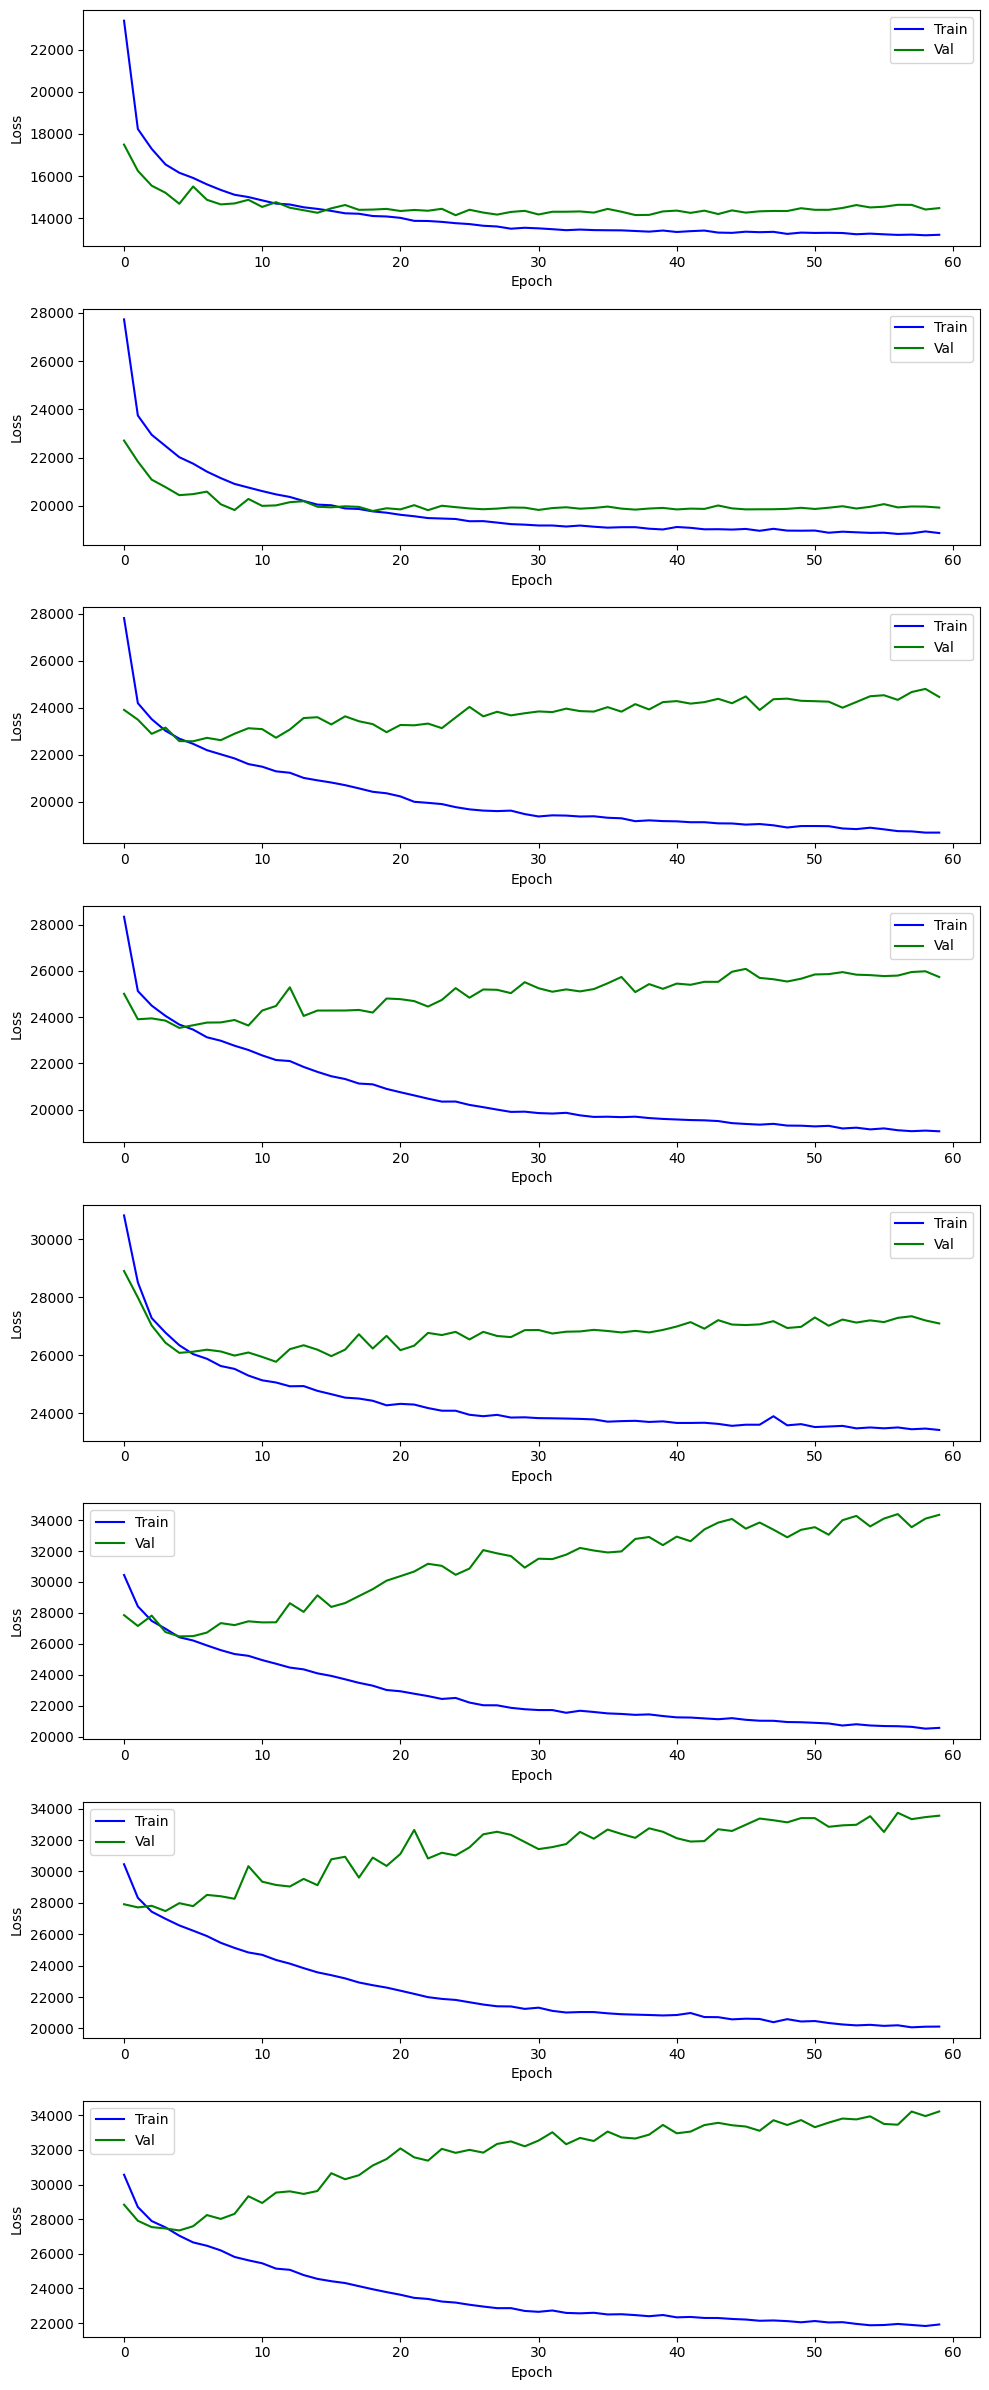

In [10]:
num_models = 8
inference_helpers.arrange_figures_in_rows(n_rows=num_models, prefix="final_")